In [1]:
import numpy as np
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [5]:
print(boston.data.shape)

(506, 13)


In [9]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [126]:
data = boston.data
data.shape

(506, 13)

In [127]:
targets = boston.target

In [128]:
targets.shape

(506,)

In [129]:
weights = np.random.uniform(low=-1, high=1, size=13)
weights

array([-0.84868688, -0.47512433,  0.91669867,  0.93235443,  0.68971136,
        0.7649327 , -0.71241329, -0.56282011, -0.54895483,  0.53056782,
       -0.31224733, -0.97634333, -0.34094728])

In [162]:
bias = 0

In [150]:
# Normalization

for i in range(13):
    feature_avg = np.mean(data[:, i])
    feature_max = np.amax(data[:, i])
    data[:, i] = (data[:, i]-feature_avg)/feature_max

In [163]:
def hypothesis(weights):
    return data.dot(weights) + np.repeat(bias, 506)

In [164]:
hypothesis(weights).shape

(506,)

In [165]:
def cost(weights):
    return np.mean(np.square(hypothesis(weights) - targets))/2
cost(weights)

303.12921421166192

In [154]:
def gradient(weights):
    gradients = []
    
    for (weight_num, weight) in enumerate(weights):
        grad = np.mean((hypothesis(weights)-targets) * data[:, weight_num])
        gradients.append(grad)
        
    gradients = np.array(gradients)
    
    return gradients

In [155]:
gradient(weights)

array([  0.42388593,  -0.97025306,   2.20603653,  -0.38392908,
         1.77182706,  -1.81289274,   3.46211588,  -0.75824675,
         2.64303755,   2.91931672,   2.92289305, -11.88036118,   2.07147554])

In [166]:
def bias_gradient(bias):
    return np.mean(hypothesis(weights) - targets)

In [168]:
bias_gradient(bias)

-22.532806324110673

In [196]:
LEARNING_RATE = 0.01

def gradient_descent(weights, bias, num_epochs):
    costs = []
    for i in range(num_epochs):
        weights = weights - LEARNING_RATE * gradient(weights)
        bias = bias - LEARNING_RATE * bias_gradient(weights)
        costs.append(cost(weights))
        
    return costs, weights, bias

In [197]:
costs, new_weights, bias_new = gradient_descent(weights, bias, 1000)

In [198]:
new_weights

array([-1.46954408,  0.54031686, -1.17887647,  2.64398321, -1.14163232,
        8.20456438, -0.63209118, -2.2311865 ,  0.78458591, -1.00573789,
       -4.04471514,  0.5176281 , -6.61304981])

In [199]:
costs[999]

265.40403777480702

In [202]:
import matplotlib.pyplot as plt

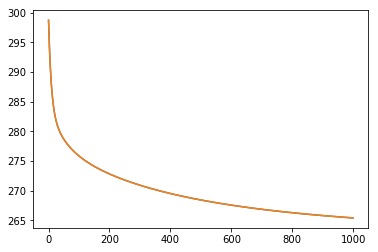

In [205]:
plt.plot(costs)
plt.show()